In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [6]:
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

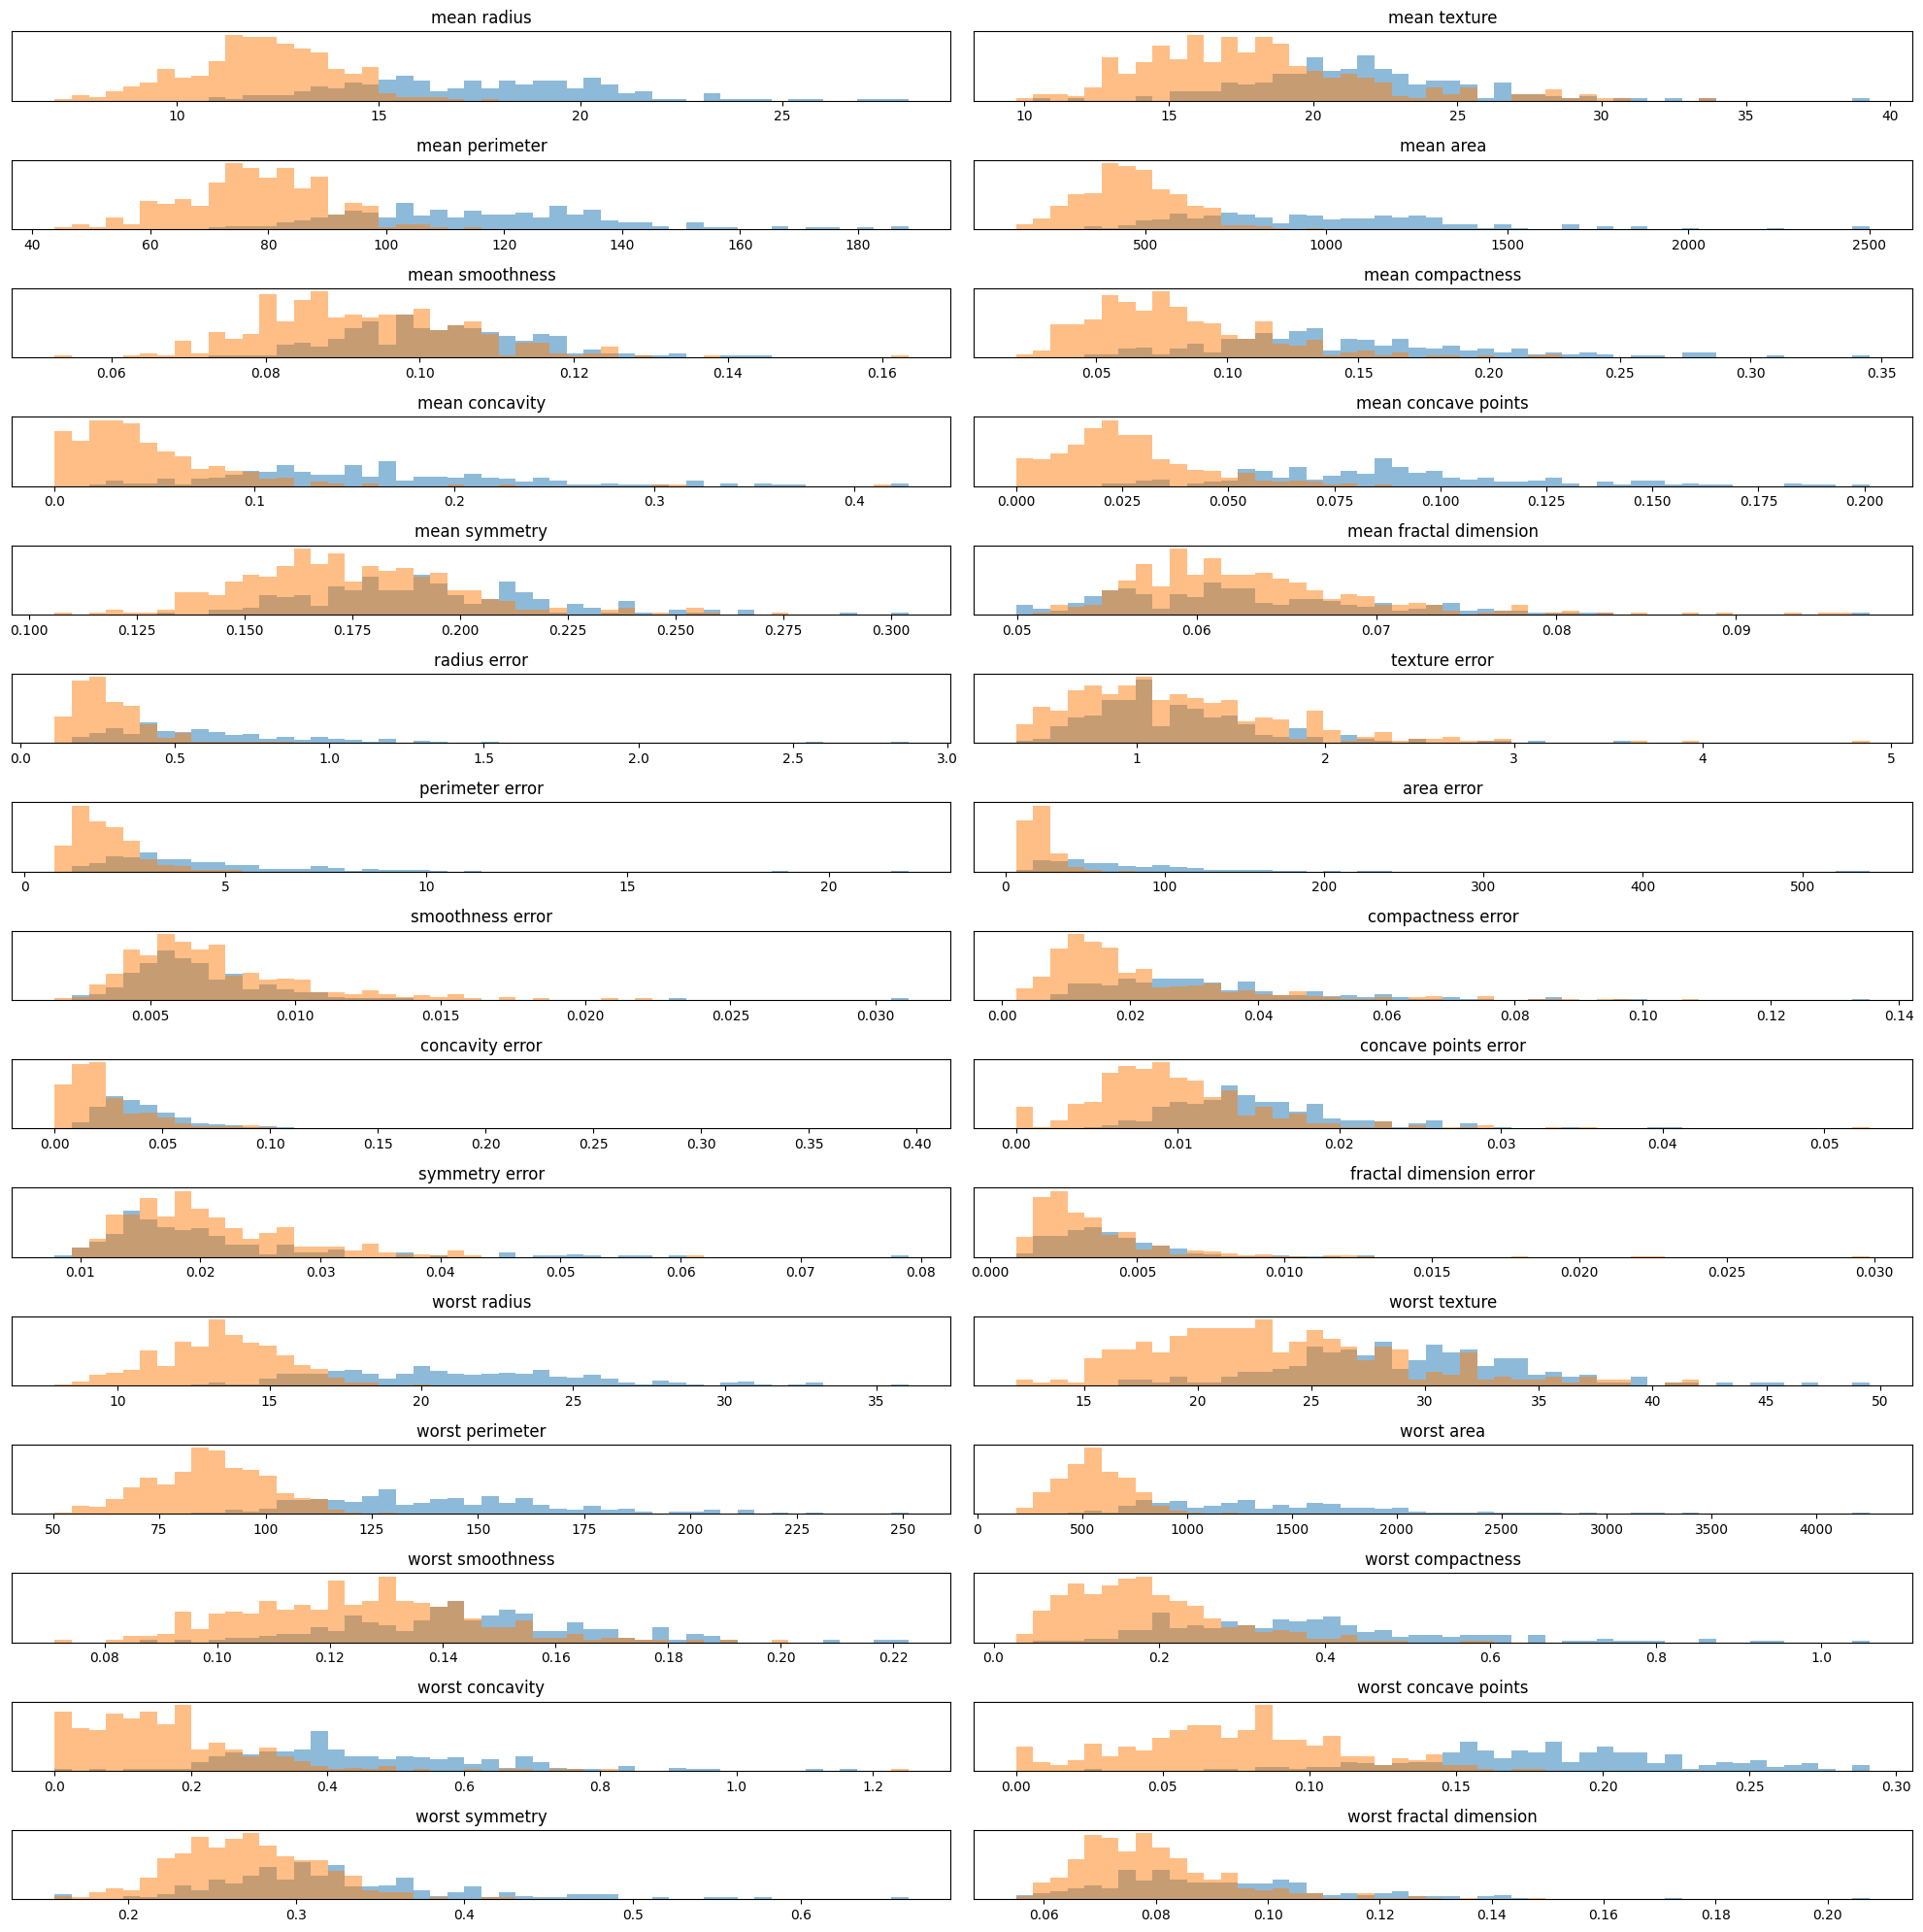

In [7]:
fig, axes = plt.subplots(15, 2, figsize=(20, 20))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)

    ax[i].hist(malignant[:, i], bins=bins, alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=0.5)

    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

fig.tight_layout()
plt.show()

# x축 : feature들
# y축 : 빈도수

In [8]:
x_scale = StandardScaler().fit_transform(cancer.data)

In [9]:
x_pca = PCA(n_components=2).fit_transform(x_scale)
print(x_pca.shape)

(569, 2)


In [10]:
print(cancer.data.shape)

(569, 30)


<Axes: >

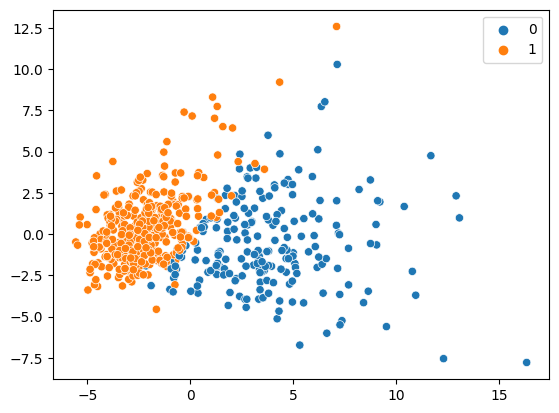

In [11]:
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cancer.target)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, cancer.target, test_size=0.3, random_state=1)

In [13]:
model = RandomForestClassifier(random_state=1)

In [14]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
predict = model.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.95      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

